In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv("Gesture_Phase_Segmentation_Data.csv")

data.head()

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,sy,sz,lwx,lwy,lwz,rwx,rwy,rwz
0,5.347435,4.363681,1.501913,5.258967,4.319263,1.488703,5.037871,1.618295,1.778350,5.062803,4.229656,1.772577,4.972902,4.301065,1.564781,5.553945,4.370456,1.553521
1,4.869622,4.254210,1.556133,5.240113,4.346338,1.554309,5.037610,1.618370,1.778573,5.061430,4.228504,1.772859,4.974908,4.303656,1.565527,5.423875,4.303708,1.569942
2,5.357447,4.364039,1.500969,5.238928,4.347924,1.554150,5.037514,1.618298,1.778774,5.059245,4.228004,1.773568,4.981612,4.305363,1.563643,5.332170,4.438061,1.572841
3,4.942886,4.281878,1.546513,5.111436,4.229660,1.527091,5.037526,1.618612,1.778855,5.056475,4.226891,1.774519,4.987158,4.304063,1.565929,5.311104,4.396774,1.566368
4,5.003160,4.278530,1.542866,4.985812,4.182155,1.520330,5.037557,1.619226,1.778925,5.052367,4.225485,1.775536,4.983912,4.296833,1.569889,5.193762,4.335417,1.560144


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7342 entries, 0 to 7341
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lhx     7342 non-null   float64
 1   lhy     7342 non-null   float64
 2   lhz     7342 non-null   float64
 3   rhx     7342 non-null   float64
 4   rhy     7342 non-null   float64
 5   rhz     7342 non-null   float64
 6   hx      7342 non-null   float64
 7   hy      7342 non-null   float64
 8   hz      7342 non-null   float64
 9   sx      7342 non-null   float64
 10  sy      7342 non-null   float64
 11  sz      7342 non-null   float64
 12  lwx     7342 non-null   float64
 13  lwy     7342 non-null   float64
 14  lwz     7342 non-null   float64
 15  rwx     7342 non-null   float64
 16  rwy     7342 non-null   float64
 17  rwz     7342 non-null   float64
dtypes: float64(18)
memory usage: 1.0 MB


In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7337    False
7338    False
7339    False
7340    False
7341    False
Length: 7342, dtype: bool

In [ ]:
import sidetable
data.stb.missing()

,missing,total,percent
lhx,0,7342,0.0
lhy,0,7342,0.0
rwy,0,7342,0.0
rwx,0,7342,0.0
lwz,0,7342,0.0
lwy,0,7342,0.0
lwx,0,7342,0.0
sz,0,7342,0.0
sy,0,7342,0.0
sx,0,7342,0.0


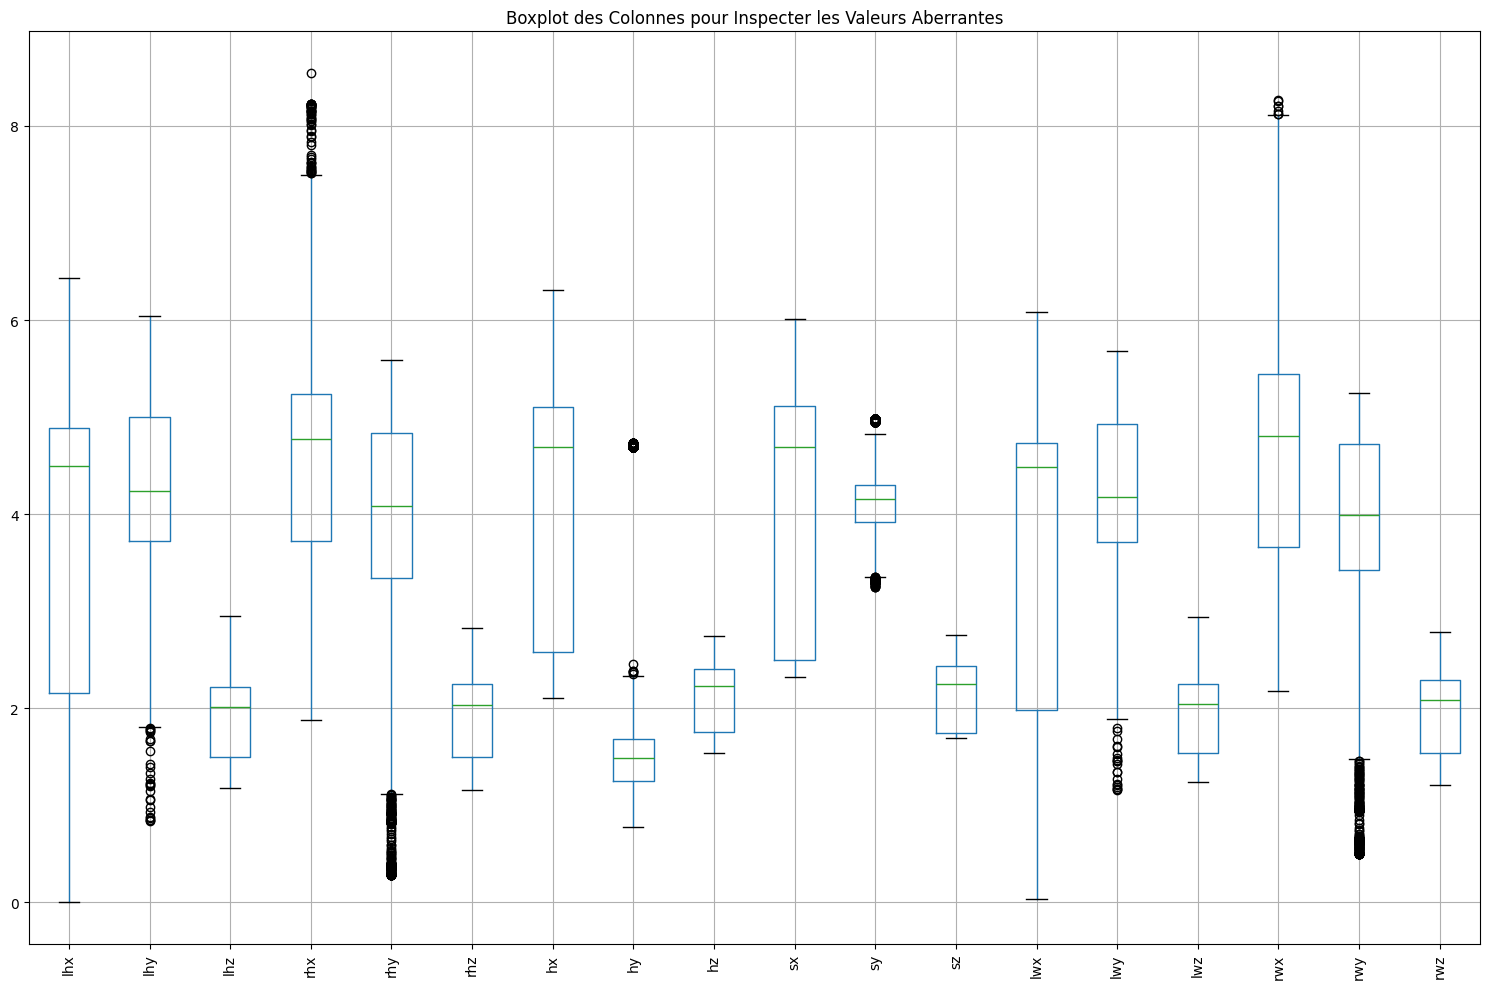

In [ ]:
df = pd.DataFrame(data)

# Vérification des valeurs aberrantes en utilisant la méthode IQR pour chaque colonne
def detecter_valeurs_aberrantes_iqr(df):
    valeurs_aberrantes = {}
    for colonne in df.columns:
        Q1 = df[colonne].quantile(0.25)
        Q3 = df[colonne].quantile(0.75)
        IQR = Q3 - Q1
        borne_inferieure = Q1 - 1.5 * IQR
        borne_superieure = Q3 + 1.5 * IQR
        valeurs_aberrantes[colonne] = ((df[colonne] < borne_inferieure) | (df[colonne] > borne_superieure)).sum()
    return valeurs_aberrantes

valeurs_aberrantes = detecter_valeurs_aberrantes_iqr(df)

# Création de boxplots pour chaque colonne afin d'inspecter visuellement les valeurs aberrantes
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title('Boxplot des Colonnes pour Inspecter les Valeurs Aberrantes')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

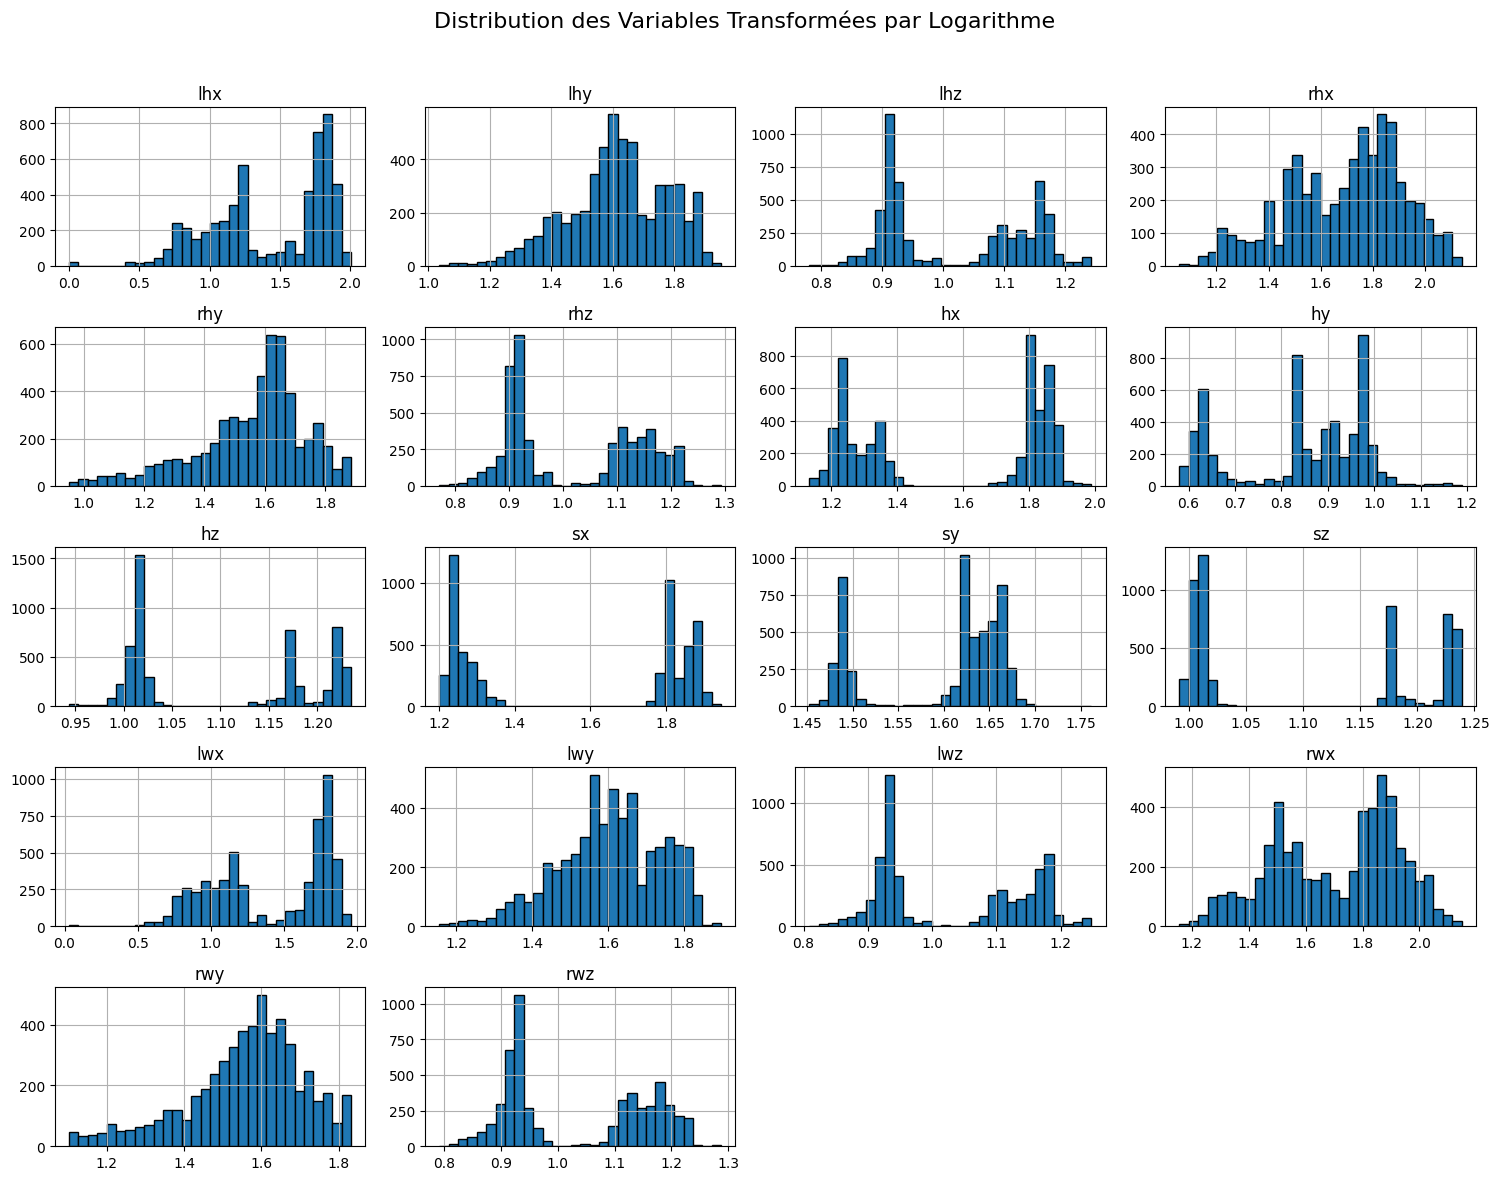

In [ ]:
# Traçage de la distribution de chaque variable après transformation logarithmique
df_log_transformed.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Distribution des Variables Transformées par Logarithme', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# L'ensemble des données est composé de caractéristiques extraites de 7 vidéos de personnes en train de gesticuler.
# J'ai pas de connaissances techniques sur ce domaine , je decide de ne pas supprimer les outliers

In [ ]:
# Matrice des donnees
x = data.values
x[:5]

# Normalisation
x_normalized = normalize(x)
x_normalized[:5]

array([[0.3228824 , 0.26348255, 0.09068671, 0.31754064, 0.26080056,
        0.08988908, 0.30419068, 0.09771395, 0.1073782 , 0.3056961 ,
        0.25539001, 0.10702962, 0.3002678 , 0.25970175, 0.09448273,
        0.33535164, 0.26389163, 0.09380284],
       [0.2980569 , 0.26038913, 0.09524686, 0.32073369, 0.26602805,
        0.09513521, 0.30833901, 0.09905622, 0.10886183, 0.30979697,
        0.25881574, 0.10851209, 0.30450118, 0.26341559, 0.09582184,
        0.33198129, 0.26341878, 0.09609207],
       [0.32428129, 0.26415123, 0.09085226, 0.31710745, 0.2631758 ,
        0.09407126, 0.30491605, 0.09795408, 0.10766754, 0.3062314 ,
        0.25591716, 0.10735242, 0.30153235, 0.26059963, 0.09464586,
        0.3227513 , 0.26863171, 0.09520261],
       [0.30358565, 0.2629874 , 0.09498482, 0.31393778, 0.25978024,
        0.09379195, 0.30939832, 0.09941305, 0.10925497, 0.31056214,
        0.25961017, 0.10898866, 0.30630478, 0.26434997, 0.09617733,
        0.32620113, 0.27004416, 0.09620429],
    

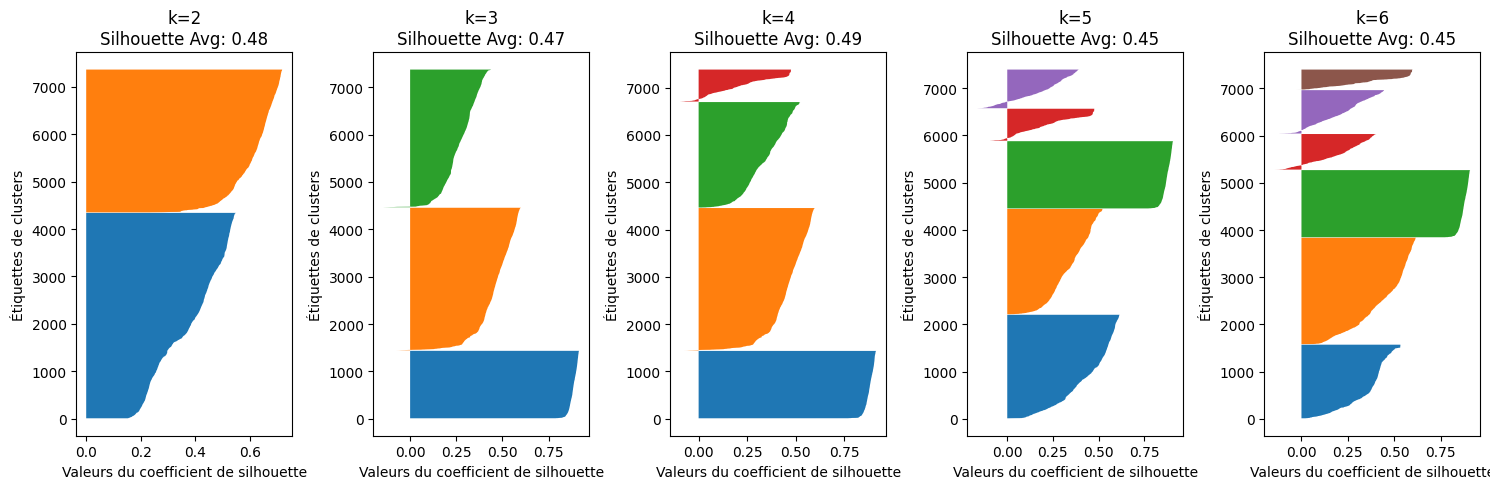

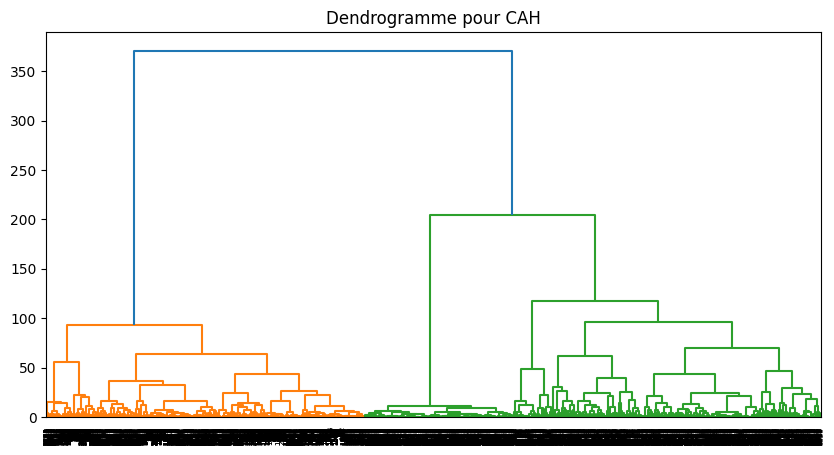

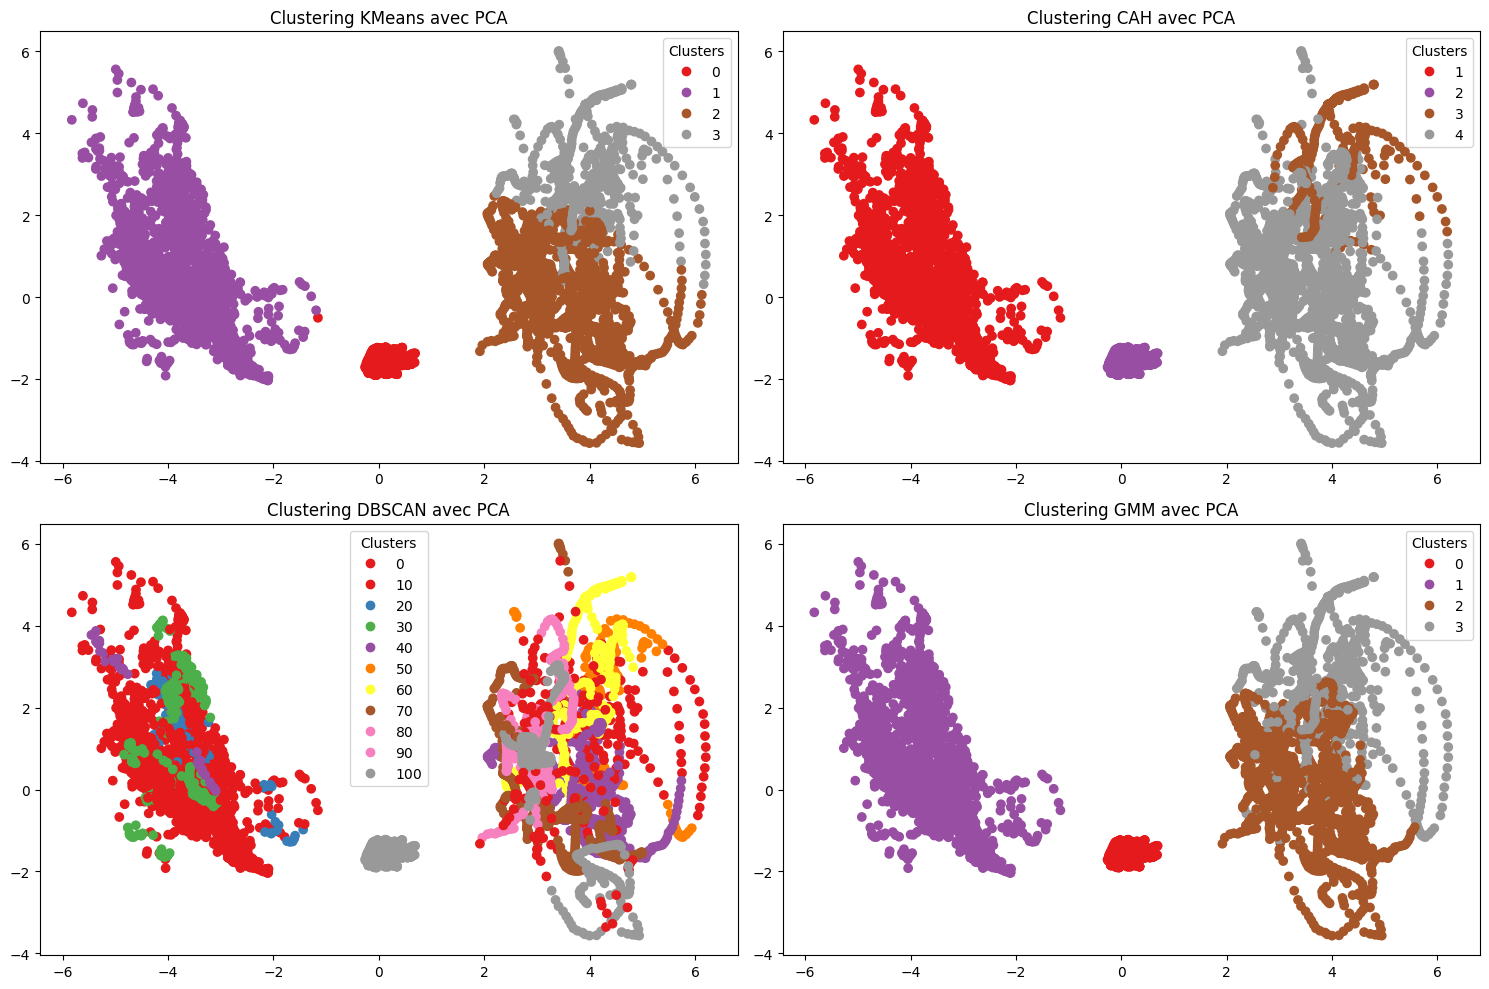

Variance expliquée par les composants PCA : [0.62421251 0.15115783]
Score Silhouette KMeans : 0.4885927474528493
Score Silhouette CAH : 0.48204045023193626
Score Silhouette DBSCAN : 0.13888713468793573
Score Silhouette GMM : 0.48059826996401855
Nombre de classes (KMeans) : 4
Nombre d'individus dans chaque classe (KMeans) : {0: 1425, 1: 3010, 2: 2230, 3: 677}
Nombre de classes (GMM) : 4
Nombre d'individus dans chaque classe (GMM) : {0: 1424, 1: 3011, 2: 2142, 3: 765}


In [ ]:
# Matrice des données
x = data.values
x[:5]
# Affichage des 5 premières lignes de la matrice des données
#print("Premières lignes de la matrice des données :")
#print(x[:5])

# Normalisation
x_normalized = normalize(x)

# Affichage des 5 premières lignes des données normalisées
#print("Premières lignes des données normalisées :")
#print(x_normalized[:5])

# Étape 1 : Standardiser le jeu de données (après normalisation)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x_normalized)

# Fonction pour afficher les graphiques de silhouette pour différentes valeurs de k dans un subplot
def plot_silhouette_subplot(data, range_n_clusters):
    fig, axes = plt.subplots(1, len(range_n_clusters), figsize=(15, 5))
    for idx, n_clusters in enumerate(range_n_clusters):
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        sample_silhouette_values = silhouette_samples(data, cluster_labels)

        ax = axes[idx]
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            ax.fill_betweenx(np.arange(y_lower, y_upper),
                             0, ith_cluster_silhouette_values)
            y_lower = y_upper + 10

        ax.set_title(f"k={n_clusters}\nSilhouette Avg: {silhouette_avg:.2f}")
        ax.set_xlabel("Valeurs du coefficient de silhouette")
        ax.set_ylabel("Étiquettes de clusters")

    plt.tight_layout()
    plt.show()

# 1. Clustering KMeans avec choix de k via silhouette
range_n_clusters = [2, 3, 4, 5, 6]  # Choix de k pour évaluer le nombre de clusters
plot_silhouette_subplot(data_scaled, range_n_clusters)

# Choix final pour KMeans
k = 4  # Sélectionner le meilleur k basé sur les résultats précédents
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels_kmeans = kmeans.fit_predict(data_scaled)

# 2. CAH (Classification Ascendante Hiérarchique)
Z = linkage(data_scaled, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogramme pour CAH')
plt.show()

# Extraction des labels de cluster pour la CAH
labels_cah = fcluster(Z, t=k, criterion='maxclust')

# 3. Clustering DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(data_scaled)

# 4. GMM (Modèle de Mélange Gaussien)
gmm = GaussianMixture(n_components=k, random_state=42)
labels_gmm = gmm.fit_predict(data_scaled)

# Étape 5 : Analyse PCA pour réduire la dimensionnalité pour la visualisation
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Visualisation des clusters avec les données réduites via PCA avec légendes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# KMeans PCA
scatter = axs[0, 0].scatter(data_pca[:, 0], data_pca[:, 1], c=labels_kmeans, cmap='Set1')
axs[0, 0].set_title('Clustering KMeans avec PCA')
axs[0, 0].legend(*scatter.legend_elements(), title="Clusters")

# CAH PCA
scatter = axs[0, 1].scatter(data_pca[:, 0], data_pca[:, 1], c=labels_cah, cmap='Set1')
axs[0, 1].set_title('Clustering CAH avec PCA')
axs[0, 1].legend(*scatter.legend_elements(), title="Clusters")

# DBSCAN PCA
scatter = axs[1, 0].scatter(data_pca[:, 0], data_pca[:, 1], c=labels_dbscan, cmap='Set1')
axs[1, 0].set_title('Clustering DBSCAN avec PCA')
axs[1, 0].legend(*scatter.legend_elements(), title="Clusters")

# GMM PCA
scatter = axs[1, 1].scatter(data_pca[:, 0], data_pca[:, 1], c=labels_gmm, cmap='Set1')
axs[1, 1].set_title('Clustering GMM avec PCA')
axs[1, 1].legend(*scatter.legend_elements(), title="Clusters")

plt.tight_layout()
plt.show()

# Variance expliquée par les composants de PCA
explained_variance = pca.explained_variance_ratio_
print(f'Variance expliquée par les composants PCA : {explained_variance}')

# Étape 6 : Évaluation des clusters avec le Score Silhouette
score_kmeans = silhouette_score(data_scaled, labels_kmeans)
score_cah = silhouette_score(data_scaled, labels_cah)
score_dbscan = silhouette_score(data_scaled, labels_dbscan) if len(set(labels_dbscan)) > 1 else -1
score_gmm = silhouette_score(data_scaled, labels_gmm)

# Affichage des scores de silhouette
print(f'Score Silhouette KMeans : {score_kmeans}')
print(f'Score Silhouette CAH : {score_cah}')
print(f'Score Silhouette DBSCAN : {score_dbscan}')
print(f'Score Silhouette GMM : {score_gmm}')

# Nombre d'individus dans chaque classe pour KMeans
unique_classes_kmeans, counts_kmeans = np.unique(labels_kmeans, return_counts=True)
print(f'Nombre de classes (KMeans) : {len(unique_classes_kmeans)}')
print(f'Nombre d\'individus dans chaque classe (KMeans) : {dict(zip(unique_classes_kmeans, counts_kmeans))}')

# Nombre d'individus dans chaque classe pour GMM
unique_classes_gmm, counts_gmm = np.unique(labels_gmm, return_counts=True)
print(f'Nombre de classes (GMM) : {len(unique_classes_gmm)}')
print(f'Nombre d\'individus dans chaque classe (GMM) : {dict(zip(unique_classes_gmm, counts_gmm))}')

# comparaison globale des résultats obtenus à partir de l'analyse PCA et des différentes méthodes de clustering :

## Comparaison des Résultats

### 1. Variance Expliquée par les Composants PCA
- **Composants PCA** :
  - **Composant 1** : 62.42%
  - **Composant 2** : 15.12%
  
Cela indique que le premier composant principal capture une grande partie de la variance des données, ce qui suggère que la plupart des informations importantes sont concentrées dans ce composant.

### 2. Scores Silhouette
Les scores silhouette mesurent la qualité du clustering, où un score plus élevé indique une meilleure séparation entre les clusters.

- **KMeans** : **0.49**
- **CAH (Classification Ascendante Hiérarchique)** : **0.48**
- **DBSCAN** : **0.14**
- **GMM (Modèle de Mélange Gaussien)** : **0.48**

#### Interprétation des Scores Silhouette :
- **KMeans** présente le meilleur score silhouette, indiquant une séparation relativement bonne entre les clusters.
- **CAH** et **GMM** ont des scores similaires, légèrement inférieurs à celui de KMeans, ce qui suggère une séparation acceptable mais moins marquée.
- **DBSCAN** a un score très bas, ce qui peut indiquer que les clusters ne sont pas bien définis ou qu'il y a beaucoup de bruit dans les données.

### 3. Nombre de Classes
Les méthodes KMeans et GMM ont toutes deux identifié **4 classes**.

#### Distribution des Individus par Classe :
- **KMeans** :
  - Classe 0 : 1425 individus
  - Classe 1 : 3010 individus
  - Classe 2 : 2230 individus
  - Classe 3 : 677 individus

- **GMM** :
  - Classe 0 : 1424 individus
  - Classe 1 : 3011 individus
  - Classe 2 : 2142 individus
  - Classe 3 : 765 individus

#### Observations sur la Distribution :
- Les distributions des classes sont très similaires entre KMeans et GMM, avec un léger décalage dans le nombre d'individus par classe.
- La classe majoritaire est la classe 1, qui contient le plus grand nombre d'individus dans les deux méthodes.

## Conclusion Globale
- La méthode KMeans semble être la plus efficace pour ce jeu de données, offrant le meilleur score silhouette et une bonne séparation des classes.
- La transformation logarithmique a permis de réduire la dimensionnalité tout en conservant une proportion significative de la variance.
- DBSCAN pourrait nécessiter un ajustement supplémentaire ou une exploration plus approfondie pour améliorer la définition des clusters.
